In [1]:
#本文是pca降维
#load data
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

# 加载数据
data = sio.loadmat('ex7data1.mat')
X = data['X']
print(X)

[[3.38156267 3.38911268]
 [4.52787538 5.8541781 ]
 [2.65568187 4.41199472]
 [2.76523467 3.71541365]
 [2.84656011 4.17550645]
 [3.89067196 6.48838087]
 [3.47580524 3.63284876]
 [5.91129845 6.68076853]
 [3.92889397 5.09844661]
 [4.56183537 5.62329929]
 [4.57407171 5.39765069]
 [4.37173356 5.46116549]
 [4.19169388 4.95469359]
 [5.24408518 4.66148767]
 [2.8358402  3.76801716]
 [5.63526969 6.31211438]
 [4.68632968 5.6652411 ]
 [2.85051337 4.62645627]
 [5.1101573  7.36319662]
 [5.18256377 4.64650909]
 [5.70732809 6.68103995]
 [3.57968458 4.80278074]
 [5.63937773 6.12043594]
 [4.26346851 4.68942896]
 [2.53651693 3.88449078]
 [3.22382902 4.94255585]
 [4.92948801 5.95501971]
 [5.79295774 5.10839305]
 [2.81684824 4.81895769]
 [3.88882414 5.10036564]
 [3.34323419 5.89301345]
 [5.87973414 5.52141664]
 [3.10391912 3.85710242]
 [5.33150572 4.68074235]
 [3.37542687 4.56537852]
 [4.77667888 6.25435039]
 [2.6757463  3.73096988]
 [5.50027665 5.67948113]
 [1.79709714 3.24753885]
 [4.3225147  5.11110472]


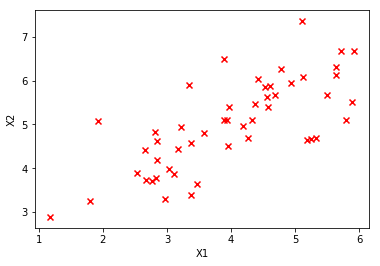

In [2]:
plt.scatter(X[:, 0], X[:, 1], marker='x', color='r')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [3]:
#feature normalize 特征归一化
def featureNormalize(X):
    X_norm = X
    mu = np.zeros((1,X.shape[1]))
    sigma = np.zeros((1,X.shape[1]))
    
    mu = np.mean(X,axis=0) #mean value of every feature
    sigma = np.std(X,axis=0)#std of every feature
    X_norm = (X - mu) / sigma
    
    return X_norm,mu,sigma 

In [4]:
# complete the pca
def pca(data_normal):
    m, n = data_normal.shape
    sigma = data_normal.T.dot(data_normal) / m  # np.cov()
    U, S, V = np.linalg.svd(sigma)  # np.linalg.eig()
    return U, S, V

In [5]:
# 降维2->1
def projectData(x, u, k):
    z = np.zeros((x.shape[0], k))
    u_reduce = u[:, :k]  # get the first k line
    z = x.dot(u_reduce)  # [m,n]*[n,k] = [m,k]
    return z

In [6]:
# 还原 1-->2
def recoverData(z, u, k):
    x_rec = np.zeros((z.shape[0], u.shape[0]))
    u_reduce = u[:, :k]
    x_rec = z.dot(u_reduce.T)  # [m,k]*[k,n] = [m,n]
    return x_rec

In [7]:
X_norm, mu, sigma = featureNormalize(X)
U, S, V = pca(X_norm)
print(U, S, V)   

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]] [1.73553038 0.26446962] [[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


In [8]:
Z = projectData(X_norm, U, k=1)  # n-->k
print(Z.shape)
X_rec = recoverData(Z, U, k=1)  # get back k--->n
print(X_rec.shape)

(50, 1)
(50, 2)


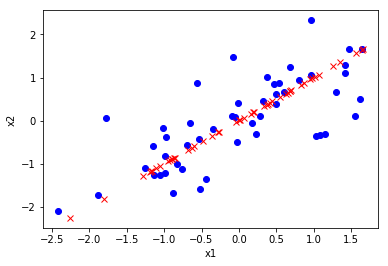

In [9]:
# 可视化一下
plt.plot(X_norm[:, 0], X_norm[:, 1], 'bo')
plt.plot(X_rec[:, 0], X_rec[:, 1], 'rx')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()